To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
#colorlist = ['#bb0000','#bb0000','#bb0000','#770000','#770000','#0000bb','#0000bb','#000077','#000077','purple','purple']
colorlist = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black', 'red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

Data to read

In [3]:
dataPath = 'ANN-Zhou-Law'
dataFile = 'ExperimentsTreated.xlsx'

To be sure that the **Experiments.xlsx** file is in the current directory, run the following block by clicking CTRL+ENTER

In [4]:
import os
print("List of files of directory:", os.path.abspath(os.getcwd() + '/' + dataPath))
os.listdir(os.getcwd() + '/' + dataPath)

List of files of directory: /home/pantale/SynologyDrive/Programming/Python/ANN-ConstitutiveLaw/ANN-Zhou-Law


['OriginalData-T.svg',
 'NN-3-5-4-1-tanh-T.svg',
 'Convergence.svg',
 'NN-3-5-3-1-tanh-T.svg',
 'NN-3-5-1-tanh-epsp.svg',
 'ExperimentsTreated.xlsx',
 'NN-3-5-2-1-tanh-epsp.svg',
 'OriginalData-epsp.svg',
 'NN-3-5-4-1-tanh-epsp.svg',
 'NN-3-5-1-tanh-T.svg',
 'NN-3-5-2-1-tanh-T.svg',
 'NN-3-5-3-1-tanh-epsp.svg',
 '.ipynb_checkpoints']

Read the content of the Excel file using the pandas library method read_excel.

In [5]:
excelData = pd.read_excel(dataPath + '/' + dataFile, None)

Extract list of temperatures from the name of sheets

In [6]:
len(excelData)
temperatures = []
temps = list(excelData.keys())
for T in temps:
    temperatures.append(int(T.replace('°C','')))
temperaturesOrig = temperatures
nTemp = len(temperatures)
nTemp, temperatures

(12, [750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300])

Get the values of epsp

In [7]:
dataSheet = excelData[str(temperatures[0]) + '°C']
epsp = []
for i in range(1, dataSheet.shape[1]):
    epsp.append(dataSheet.columns[i])
epspOrig = epsp
nEpsp = len(epsp)
nEpsp, epsp

(3, [0.001, 0.01, 0.1])

Extract data from the panda sheets

In [8]:
# Read first sheet
dataSheet = excelData[str(temperatures[0]) + '°C']
data = dataSheet.values
eps = data[:,0]
sig = data[:,1:]
# Append the other sheets
for T in temperatures[1:]:
    dataSheet = excelData[str(T) + '°C']
    data = dataSheet.values
    sig = np.append(sig, data[:,1:], axis=1)
nEps = len(eps)

In [9]:
temperatures = np.array(temperatures)
epsp = np.array(epsp)
epsp = np.log(epsp/epsp.min())
epspArray = np.tile(epsp,temperatures.shape[0])
temperaturesArray = temperatures.repeat(epsp.shape[0])
epspArray, temperaturesArray

(array([0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019, 0.        , 2.30258509, 4.60517019, 0.        ,
        2.30258509, 4.60517019, 0.        , 2.30258509, 4.60517019,
        0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019, 0.        , 2.30258509, 4.60517019, 0.        ,
        2.30258509, 4.60517019, 0.        , 2.30258509, 4.60517019,
        0.        , 2.30258509, 4.60517019, 0.        , 2.30258509,
        4.60517019]),
 array([ 750,  750,  750,  800,  800,  800,  850,  850,  850,  900,  900,
         900,  950,  950,  950, 1000, 1000, 1000, 1050, 1050, 1050, 1100,
        1100, 1100, 1150, 1150, 1150, 1200, 1200, 1200, 1250, 1250, 1250,
        1300, 1300, 1300]))

In [10]:
entries = np.empty([epspArray.shape[0]*eps.shape[0], 4])
row = 0
colEps = 0
colEpsp = 1
colT = 2
colSig = 3
for i in range(epspArray.shape[0]):
    for j in range(eps.shape[0]):
        entries[row, colEps] = eps[j]
        entries[row, colEpsp] = epspArray[i]
        entries[row, colT] = temperaturesArray[i]
        entries[row, colSig] = sig[j,i]
        row += 1
entries

array([[0.00000000e+00, 0.00000000e+00, 7.50000000e+02, 6.99834514e+01],
       [1.00000000e-02, 0.00000000e+00, 7.50000000e+02, 9.60864812e+01],
       [2.00000000e-02, 0.00000000e+00, 7.50000000e+02, 1.31832831e+02],
       ...,
       [6.80000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51180311e+01],
       [6.90000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51314594e+01],
       [7.00000000e-01, 4.60517019e+00, 1.30000000e+03, 1.51502250e+01]])

In [11]:
maxEntries = entries.max(axis=0)
maxEntries

array([7.00000000e-01, 4.60517019e+00, 1.30000000e+03, 3.06095599e+02])

In [12]:
NNentries = entries / np.array(maxEntries)
NNentries

array([[0.        , 0.        , 0.57692308, 0.22863266],
       [0.01428571, 0.        , 0.57692308, 0.31391004],
       [0.02857143, 0.        , 0.57692308, 0.43069169],
       ...,
       [0.97142857, 1.        , 1.        , 0.0493899 ],
       [0.98571429, 1.        , 1.        , 0.04943377],
       [1.        , 1.        , 1.        , 0.04949508]])

In [13]:
def sbPlot(n):
    if (n == 1): return 1, 1
    if (n <= 2): return 1, 2
    if (n <= 4): return 2, 2
    if (n <= 6): return 3, 2
    if (n <= 9): return 3, 3
    if (n <=12): return 4, 3
    return 0,0

def sbPlotSize(n):
    x, y = sbPlot(n)
    return 8*y, 6*x

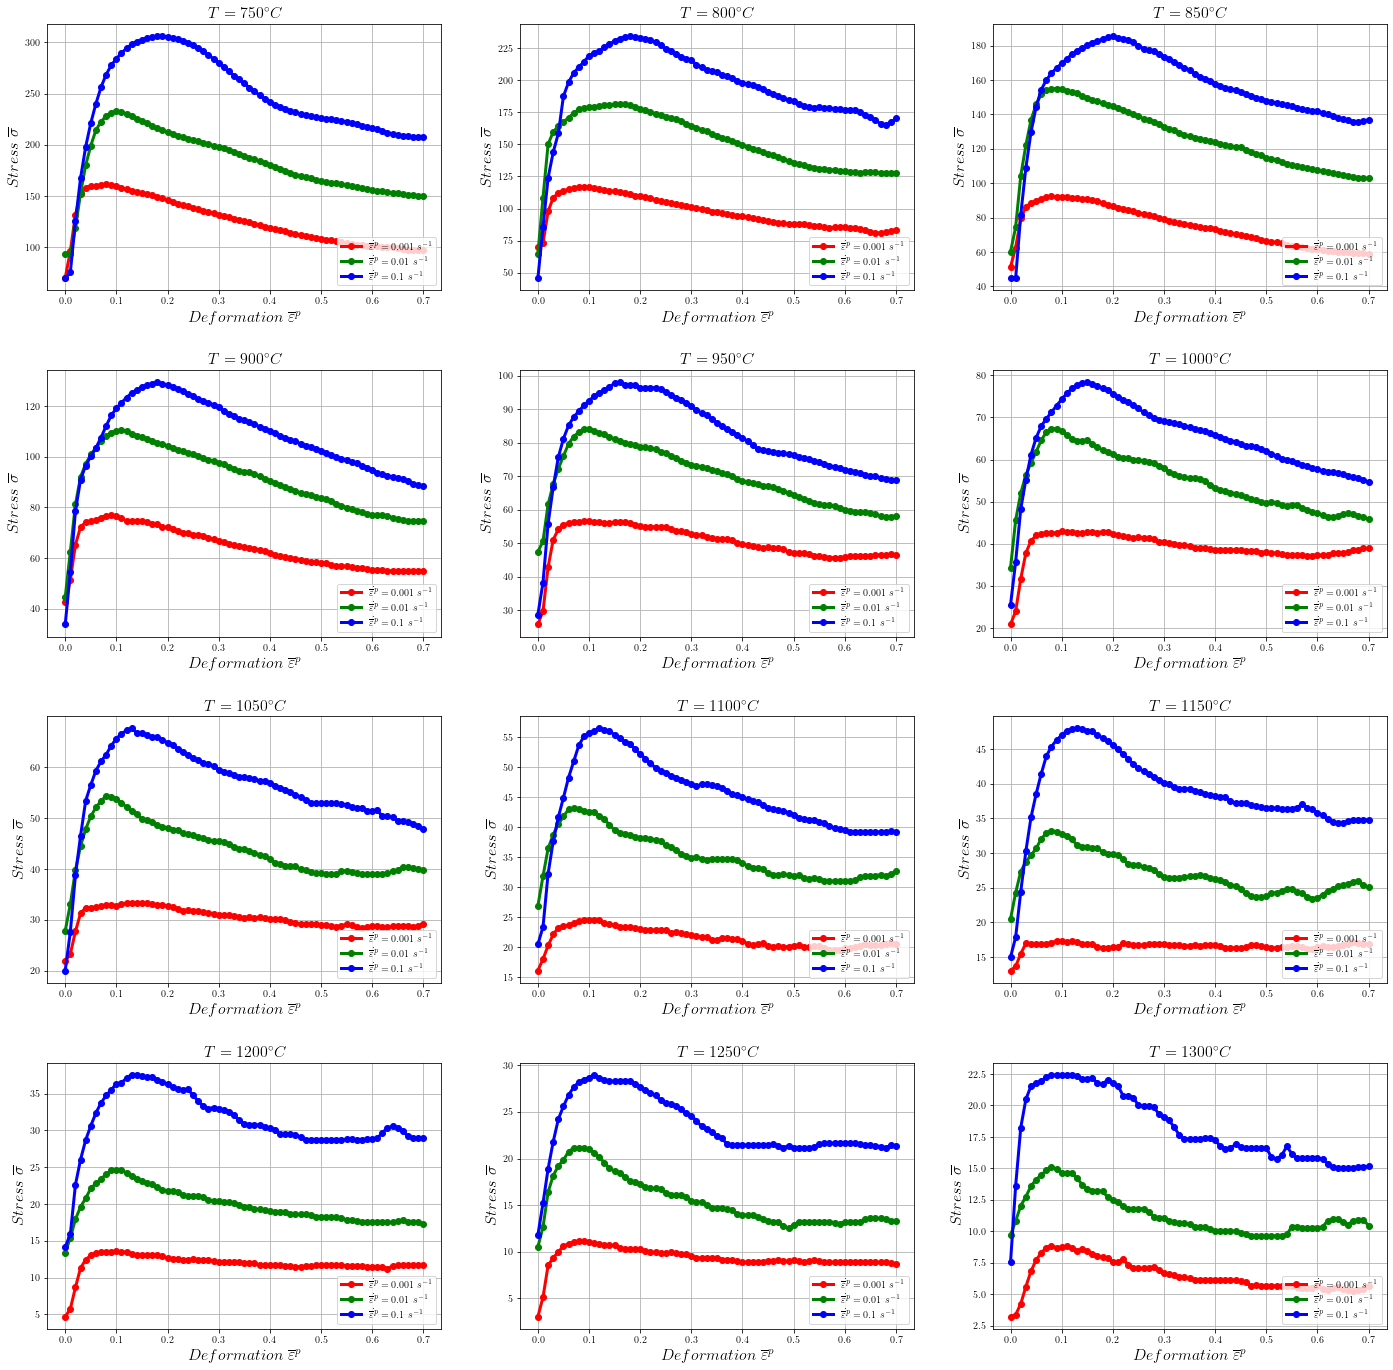

In [19]:
plt.figure(figsize = sbPlotSize(nTemp))
plt.rc('text', usetex = True)
plt.subplots_adjust(hspace = 0.3)
idx = 1
for T in temperatures:
    xs, ys = sbPlot(nTemp)
    plt.subplot(xs, ys, idx)
    cl = 0
    for epspv, epspvv in zip(epsp, epspOrig):
        # filter on T
        data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
        # Plot the curves
        plt.plot(data[:,colEps]*maxEntries[colEps], data[:,colSig]*maxEntries[colSig], color=colorlist[cl], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvv) + '\ s^{-1}$', marker='o', linewidth = 3)
        cl += 1
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid()
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16)
    plt.title(r'$T=' + str(T) + '^{\circ}C$', fontsize = 16)
    idx += 1
plt.savefig(dataPath + '/' + 'OriginalData-T.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

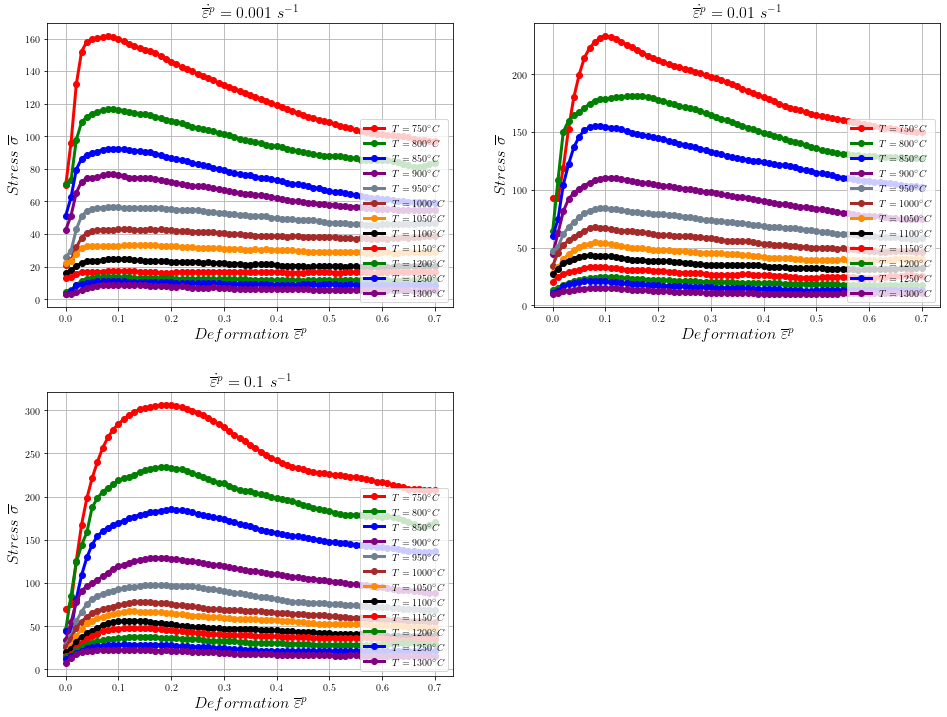

In [20]:
plt.figure(figsize = sbPlotSize(nEpsp))
plt.rc('text', usetex = True)
plt.subplots_adjust(hspace = 0.3)
idx = 1
for epspv, epspvv in zip(epsp, epspOrig):
    xs, ys = sbPlot(nEpsp)
    plt.subplot(xs, ys, idx)
    cl = 0
    for T, TOrig in zip(temperatures, temperaturesOrig):
        # filter on T
        data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
        # Plot the curves
        plt.plot(data[:,colEps]*maxEntries[colEps], data[:,colSig]*maxEntries[colSig], color=colorlist[cl], label=r'$T=' + str(TOrig) + '^{\circ}C$', marker = 'o', linewidth = 3)
        cl += 1
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid()
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16)
    plt.title(r'$\dot{\overline{\varepsilon}^p}=' + str(epspvv) + '\ s^{-1}$', fontsize = 16)
    idx += 1
plt.savefig(dataPath + '/' + 'OriginalData-epsp.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Mise en forme des données pour le RNN

In [21]:
NNinput = NNentries[:,colEps:colSig]
NNoutput = NNentries[:,colSig]
NNinput.shape, NNoutput.shape

((2556, 3), (2556,))

Construction du Réseau de Neurones

In [22]:
# Importation de TensorFlow 
import numpy as np
from keras.models import Sequential
from keras.metrics import MeanSquaredError
from keras.layers.core import Dense, Activation
from keras import optimizers

In [23]:
models = []
convergenceCurves = []

In [28]:
#FACT = ['relu', 'sigmoid', 'tanh']
#COUCH = [3, 5, 7, 9]
FACT = ['tanh']
COUCH = [5, 7, 9, [5,2], [5,3], [5,4]]
COUCH = [[5,2], [5,3], [5,4]]
for c in COUCH:
    for f in FACT:
        desc = '3'
        model = Sequential()
        if type(c) == list:
            fst = True
            for k in c:
                if (fst): model.add(Dense(k, input_dim = 3, activation = f))
                else: model.add(Dense(k, activation = f))
                fst = False
                desc += '-' + str(k)
        else:
            model.add(Dense(c, input_dim = 3, activation = f))
            desc += '-' + str(c)
        model.add(Dense(1))
        desc += '-1-'+f
        model._name = desc
        models.append(model)

In [29]:
for model in models:
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
for model in models:
    model.summary()

Model: "3-5-1-tanh"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
Model: "3-5-2-1-tanh"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 35
Trainable params: 35


In [31]:
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adams', metrics=[MeanSquaredError()])

In [32]:
iterations = 1
for model in models:
    hist = np.array([])
    print("MODEL :", model.name)
    for i in range(iterations):
        history = model.fit(NNinput, NNoutput, epochs = 1000, verbose = 0)
        loss = history.history['loss']
        hist = np.append(hist, loss)
        print("Iteration :", i+1, "/", iterations, "->", loss[-1], "     ", end = '\r')
    print("\n")
    convergenceCurves.append(hist)

MODEL : 3-5-1-tanh
Iteration : 1 / 1 -> 0.0003488514630589634      

MODEL : 3-5-2-1-tanh
Iteration : 1 / 1 -> 0.00046831887448206544      

MODEL : 3-5-3-1-tanh
Iteration : 1 / 1 -> 0.00022186763817444444      

MODEL : 3-5-4-1-tanh
Iteration : 1 / 1 -> 0.0005568861379288137      



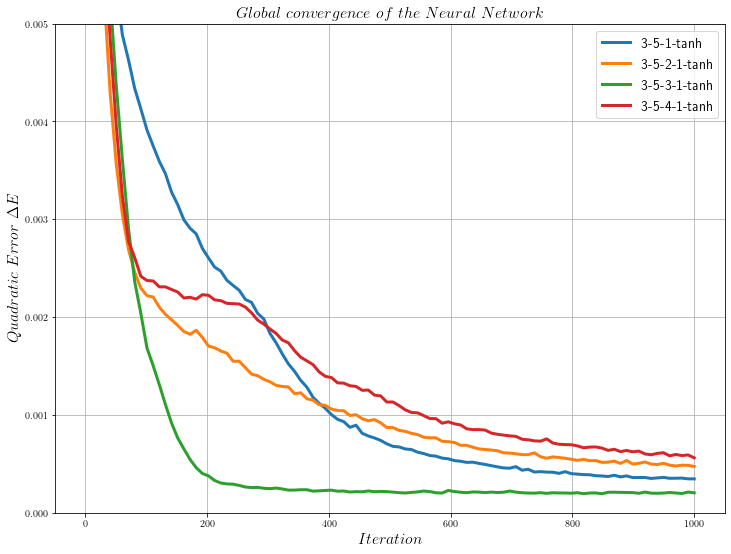

In [33]:
plt.figure(figsize = (12, 9))
plt.rc('text', usetex = True)
for model, curve in zip(models, convergenceCurves):
    shortCurve = curve[::10]
    x = np.linspace(0, len(curve), len(shortCurve))
    plt.plot(x, shortCurve, label = model.name, linewidth = 3)
plt.grid()
plt.xlabel(r'$Iteration$', fontsize = 16)
plt.ylim(0, 5e-3)
plt.ylabel(r'$Quadratic\ Error\ \Delta E$', fontsize = 16)
plt.title(r'$Global\ convergence\ of\ the\ Neural\ Network$', fontsize = 16)
plt.legend(loc = 'upper right',fancybox = True, numpoints = 1, fontsize = 14)
plt.savefig(dataPath + '/' + 'Convergence.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [81]:
def getDigitsFrom(n):
    d = int(math.log10(abs(n)))
    return n*10**(-d + 1)

def plotHisto(Y, labels, bottom, top, xlab, ylab, figname, title):
    numb = len(Y)
    X = np.arange(numb) +1

    plt.figure(figsize = (11.69,8.27)) # for a4 landscape
    plt.rc('text', usetex=True)
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16

    plt.bar(X, Y, color = '#770000')

    for x, y in zip(X, Y):
        plt.text(x, y + 0.01*(top-bottom), '$%.2f$' % getDigitsFrom(y), ha='center', va='bottom', fontsize=16)

    for i in range(0,numb):
        plt.text(X[i], (top-bottom)/10+bottom , labels[i], ha='center', va='bottom', fontsize=16, rotation=90, color='white')

    plt.ylim(bottom, top)

    plt.ylabel(ylab, fontsize = 20)
    plt.xlabel(xlab, fontsize = 20)
    plt.title(title, fontsize = 20)

    plt.tick_params(axis='x',top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
    plt.grid(True)
    plt.savefig(figname)
    plt.show()

<Figure size 864x648 with 0 Axes>

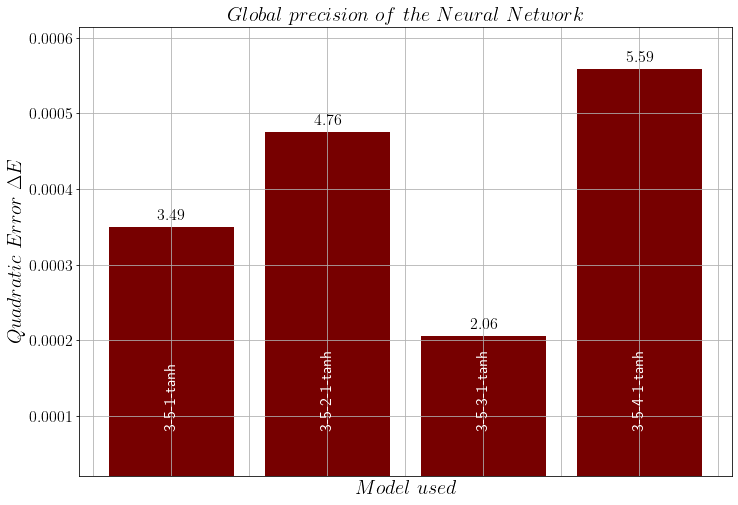

In [82]:
plt.figure(figsize = (12, 9))
plt.rc('text', usetex = True)
convs = np.array([])
labels = []
for model, curve in zip(models, convergenceCurves):
    convs=np.append(convs,curve[-10:].mean())
    labels.append(model.name)
bottom = convs.min()*0.1
top = convs.max()*1.1
ylab = r'$Quadratic\ Error\ \Delta E$'
xlab = r'$Model\ used$'
figname = dataPath + '/' + 'Precision.svg'
title = r'$Global\ precision\ of\ the\ Neural\ Network$'
plotHisto(convs, labels, bottom, top, xlab, ylab, figname, title)

In [ ]:
for model in models:
    predictedOutput = model.predict(NNinput)
    plotPredicted = predictedOutput.reshape(nEpsp*nTemp, nEps).T
    pcol = 0
    plt.figure(figsize = sbPlotSize(nTemp))
    plt.rc('text', usetex = True)
    plt.subplots_adjust(hspace = 0.3)
    idx = 1
    for T, TOrig in zip(temperatures, temperaturesOrig):
        pli = 0
        xs, ys = sbPlot(nTemp)
        plt.subplot(xs, ys, idx)
        for epspv, epspvAff in zip(epsp, epspOrig):
            # filter on T
            data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
            # Plot the curves
            plt.plot(data[:,colEps]*maxEntries[colEps], data[:,colSig]*maxEntries[colSig], colorlist[pli], label=r'$\dot{\overline{\varepsilon}^p}=' + str(epspvAff) + '\ s^{-1}$', marker = 'o', linestyle='none')
            plt.plot(data[:,colEps]*maxEntries[colEps], plotPredicted[:,pcol*nEpsp+pli]*maxEntries[colSig], colorlist[pli], linewidth = 3)
            pli += 1
        pcol += 1
        plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
        plt.grid()
        plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
        plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16)
        plt.title(r'$T=' + str(TOrig) + '^{\circ}C$', fontsize = 16)
        idx += 1
    plt.savefig(dataPath + '/' + 'NN-' + model.name + '-epsp.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [ ]:
for model in models:
    predictedOutput = model.predict(NNinput)
    plotPredicted = predictedOutput.reshape(nEpsp*nTemp, nEps).T
    pcol = 0
    plt.figure(figsize = sbPlotSize(nEpsp))
    plt.rc('text', usetex = True)
    plt.subplots_adjust(hspace = 0.3)
    idx = 1
    for epspv, epspvAff in zip(epsp, epspOrig):
        pli = 0
        xs, ys = sbPlot(nEpsp)
        plt.subplot(xs, ys, idx)
        for T, TOrig in zip(temperatures, temperaturesOrig):
            # filter on T
            data = NNentries[(entries[:,colT]==T) & (entries[:,colEpsp]==epspv), :]
            # Plot the curves
            plt.plot(data[:,colEps]*maxEntries[colEps], data[:,colSig]*maxEntries[colSig], colorlist[pli], label=r'$T=' + str(TOrig) + '^{\circ}C$', marker = 'o', linestyle='none')
            plt.plot(data[:,colEps]*maxEntries[colEps], plotPredicted[:,pcol+nEpsp*pli]*maxEntries[colSig], colorlist[pli], linewidth = 3)
            pli += 1
        pcol += 1
        plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
        plt.grid()
        plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
        plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16)
        plt.title(r'$\dot{\overline{\varepsilon}^p}=' + str(epspvAff) + '\ s^{-1}$', fontsize = 16)
        idx += 1
    plt.savefig(dataPath + '/' + 'NN-' + model.name + '-T.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()